In [252]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [253]:
# Параметры
x_start, x_end = 0, np.pi
y_start, y_end = 0, 1
h = 0.005
max_iter = 10000

In [254]:
# Функции
u0_func = lambda x, y: np.sin(4 * x) * y * np.exp(-5 * y)
f = lambda x, y: -(9 * y - 10) * np.sin(4 * x) * np.exp(-5 * y)
phiB = lambda x: -np.sin(4 * x)
phiT = lambda x: -(4 / np.exp(5)) * np.sin(4 * x)

In [255]:
# Сетки
x_arr = np.arange(x_start + h/2, x_end - h/2, h)
y_arr = np.arange(y_start + h/2, y_end - h/2, h)
X, Y = np.meshgrid(x_arr, y_arr, indexing='ij')

In [256]:
# Инициализация
z_grid = u0_func(X, Y)
z_grid -= np.mean(z_grid)
lambda_min_n = 4
lambda_max_n = (4 / h**2) * (np.sin(np.pi * (x_arr.size - 1) * h / (2 * np.pi))**2 +
                              np.sin(np.pi * (y_arr.size - 1) * h / 2)**2) + 4
tau = 2 / (lambda_min_n + lambda_max_n)

In [257]:
rhs = f(X, Y)
rhs[:, 0] += phiB(x_arr) / h
rhs[:, -1] += phiT(x_arr) / h
rhs -= np.mean(rhs)

In [258]:
def op_L(U):
    L = np.zeros_like(U)
    L[1:, :] += (U[1:, :] - U[:-1, :]) / h**2
    L[:-1, :] += (U[:-1, :] - U[1:, :]) / h**2
    L[:, 1:] += (U[:, 1:] - U[:, :-1]) / h**2
    L[:, :-1] += (U[:, :-1] - U[:, 1:]) / h**2
    # Периодичность
    L[0, :] += (U[0, :] - U[-1, :]) / h**2
    L[-1, :] += (U[-1, :] - U[0, :]) / h**2
    return L

In [259]:
# Метод простой итерации
deviation_by_step = []
U = np.zeros_like(z_grid)

# Uprev = np.zeros_like(z_grid)
# 
# for _ in range(max_iter):
#     L_U = op_L(Uprev)
#     UNext = Uprev + tau * (rhs - L_U)
#     # UNext = L_U + tau * (rhs - L_U)
# 
#     deviation_by_step.append(np.max(np.abs(UNext - z_grid)))
#     
#     
#     if np.max(np.abs(UNext - Uprev)) < 1e-6 :    
#         Uprev = UNext
#         break
#         
#     Uprev = UNext

for _ in tqdm(range(max_iter)) :
    L_U = op_L(U)
    U += tau * (rhs - L_U)
    deviation_by_step.append(np.max(np.abs(U - z_grid)))


100%|██████████| 10000/10000 [00:14<00:00, 680.66it/s]


In [260]:
U -= np.mean(U) 

deviation = np.abs(U - z_grid) 

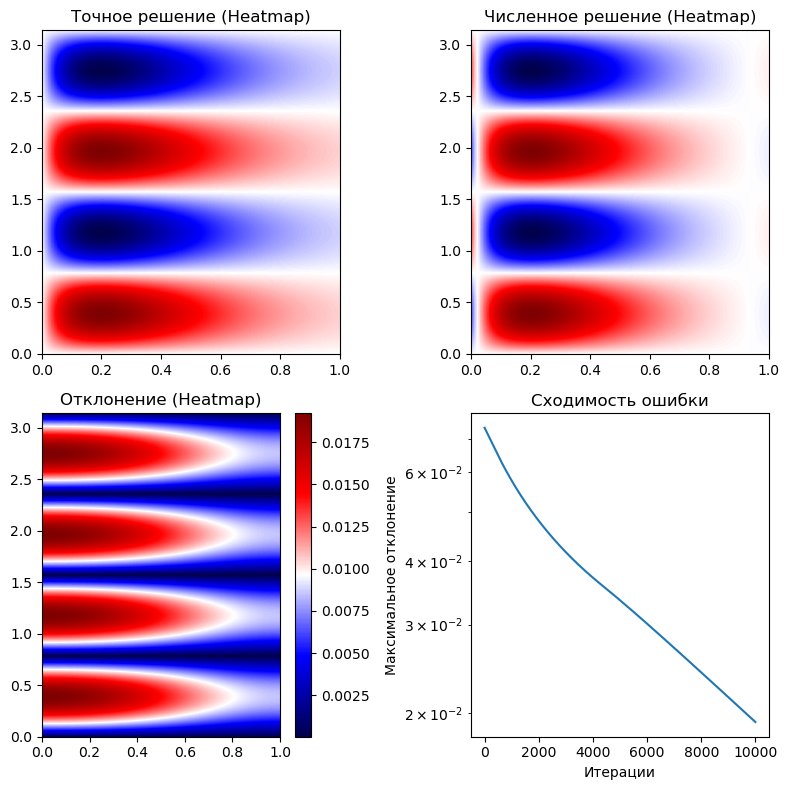

In [261]:
# Визуализация
fig = plt.figure(figsize=(8, 8))
# Тепловые карты
ax1 = fig.add_subplot(221)
ax1.imshow(z_grid, extent=[y_start, y_end, x_start, x_end], origin='lower', cmap='seismic', aspect='auto')
ax1.set_title("Точное решение (Heatmap)")

ax2 = fig.add_subplot(222)
ax2.imshow(U, extent=[y_start, y_end, x_start, x_end], origin='lower', cmap='seismic', aspect='auto')
ax2.set_title("Численное решение (Heatmap)")

ax4 = fig.add_subplot(223)
im1 = ax4.imshow(deviation, extent=[y_start, y_end, x_start, x_end], origin='lower', cmap='seismic', aspect='auto')
ax4.set_title("Отклонение (Heatmap)")
plt.colorbar(im1, ax = ax4, shrink = 1)
# График сходимости
ax5 = fig.add_subplot(224)
ax5.plot(deviation_by_step)
ax5.set_yscale("log")
ax5.set_title("Сходимость ошибки")
ax5.set_xlabel("Итерации")
ax5.set_ylabel("Максимальное отклонение")

plt.tight_layout()
plt.show()

In [262]:
# График сходимости
ax5 = fig.add_subplot(235)
ax5.plot(deviation_by_step)
ax5.set_yscale("log")
ax5.set_title("Сходимость ошибки")
ax5.set_xlabel("Итерации")
ax5.set_ylabel("Максимальное отклонение")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>